# Epileptic Seizure Detection using Basic Classification Techniques

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.utils.multiclass import unique_labels

Using TensorFlow backend.


In [2]:
data = pd.read_csv('Epileptic Seizure Recognition.csv')
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [3]:
data.groupby(['y']).count()['X1']

y
1    2300
2    2300
3    2300
4    2300
5    2300
Name: X1, dtype: int64

In [4]:
sub1 = data.iloc[0,1:179]

sub2 = data.iloc[1,1:179]

sub3 = data.iloc[2,1:179]

sub4 = data.iloc[8,1:179]

In [5]:
x = data.iloc[:,1:179]
y = data.iloc[:,179]

Text(0,0.5,'EEG Reading')

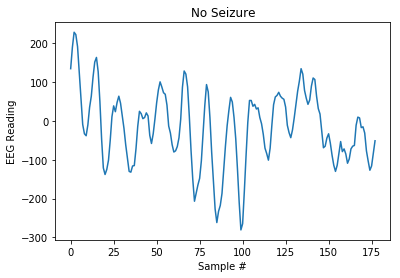

In [6]:
x = range(len(sub1))

plt.plot(x,sub1)
plt.title('No Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')
#no seizure

Text(0,0.5,'EEG Reading')

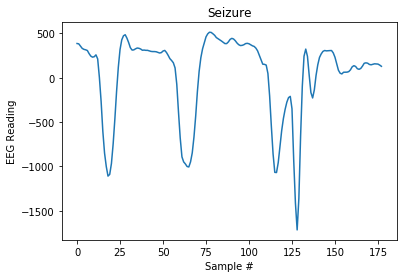

In [7]:
x = range(len(sub2))

plt.plot(x,sub2)
plt.title('Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

#seizure

Text(0,0.5,'EEG Reading')

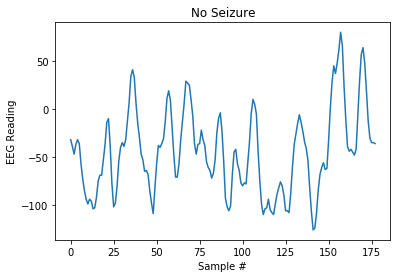

In [8]:
x = range(len(sub3))

plt.plot(x,sub3)

#no seizure
plt.title('No Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

Text(0,0.5,'EEG Reading')

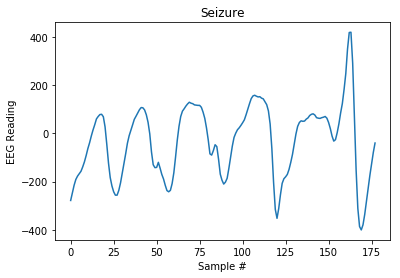

In [9]:
x = range(len(sub4))

plt.plot(x,sub4)

plt.title('Seizure')
plt.xlabel('Sample #')
plt.ylabel('EEG Reading')

(-89.0, 89.0)

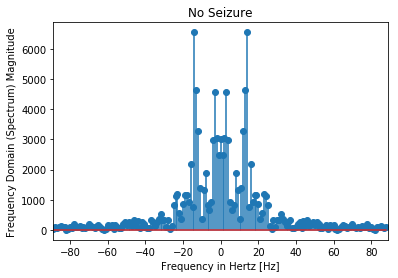

In [10]:
from scipy import fftpack

f_s = 178

X = fftpack.fft(sub1)
freqs = fftpack.fftfreq(len(sub1)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
plt.title('No Seizure')


ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [11]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

12.954622718013187

In [12]:
np.argmax((X)[:89])

13

(-89.0, 89.0)

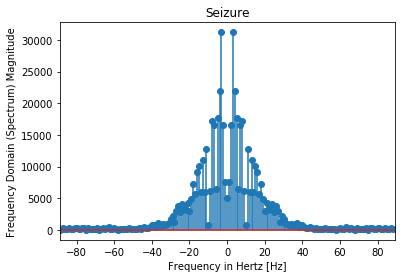

In [13]:
f_s = 178

X = fftpack.fft(sub2)
freqs = fftpack.fftfreq(len(sub2)) * f_s

fig, ax = plt.subplots()
plt.title('Seizure')


ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [14]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

11.212495723462643

In [15]:
np.argmax((X)[2:89])

2

(-89.0, 89.0)

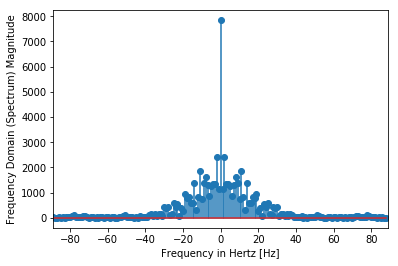

In [16]:
f_s = 178

X = fftpack.fft(sub3)
freqs = fftpack.fftfreq(len(sub3)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [17]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

12.627258598309917

In [18]:
np.argmax((X)[2:89])

6

(-89.0, 89.0)

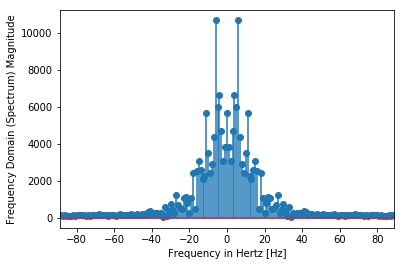

In [19]:
f_s = 178

X = fftpack.fft(sub4)
freqs = fftpack.fftfreq(len(sub4)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)

In [20]:
freqs[:89]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88.])

In [21]:
np.abs(X)[:89]

array([ 5640.        ,  3802.53274568,  3056.457834  ,  4688.51295844,
        6615.36597429,  5975.18921974, 10671.44401319,  4354.90793381,
        2935.06532098,  2426.70038989,  3513.74831991,  5660.42364118,
        2280.30795666,  2076.86306673,  2586.89997457,  3074.70470387,
        2540.81473446,   456.76265683,  2421.94642307,  1066.98238744,
         290.64786508,   798.98406457,  1109.49194574,  1068.67499248,
         469.27863924,   539.15887073,   704.60986377,  1238.17207461,
         274.60675486,   473.51734166,   754.67222822,   399.46437869,
          96.02031869,   576.85817782,    25.03379478,   287.9349318 ,
         164.65220089,   239.22236299,   243.46634937,   266.2234538 ,
         221.62336636,   349.7524283 ,   306.6877756 ,   172.59940896,
         204.32792366,   219.86106318,   171.15635358,   149.88770163,
         206.06489459,   160.49829284,   174.90396839,   231.71305603,
         140.12990982,   158.31877688,   170.20574355,   172.2482553 ,
      

In [22]:
np.average(freqs[2:40],weights=np.abs(X)[2:40])

10.92206147216407

In [23]:
np.argmax((X)[2:40])

9

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = data.iloc[:,1:179]
y = data.iloc[:,179]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [27]:
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
5,55,28,18,16,16,19,25,40,52,66,...,-6,-12,-31,-42,-54,-60,-64,-60,-56,-55
6,-55,-9,52,111,135,129,103,72,37,0,...,-137,-125,-99,-79,-62,-41,-26,11,67,128
7,1,-2,-8,-11,-12,-17,-15,-16,-18,-17,...,-67,-79,-91,-97,-88,-76,-72,-66,-57,-39
8,-278,-246,-215,-191,-177,-167,-157,-139,-118,-92,...,-386,-400,-379,-336,-281,-226,-174,-125,-79,-40
9,8,15,13,3,-6,-8,-5,4,25,41,...,65,49,31,11,-5,-17,-19,-15,-15,-11


### Extract Features

In [28]:
import weighted

In [29]:
import copy

In [30]:
f_s = 178 #sampling frequency

def process_statistics(row):
    #print(type(row))
    X = fftpack.fft(row)
    freqs = fftpack.fftfreq(len(row)) * f_s
    
    wtavg = np.average(freqs[2:40],weights=np.abs(X)[2:40]) #avg weighted frequency cutting out 2 - 40 hz band
    
    temp = copy.copy(row)
    
    new_row = {}
    
    new_row['max'] = max(temp)
    
    new_row['min'] = min(temp)
    
    new_row['median'] = np.median(temp)
    
    new_row['std'] = np.std(temp)
    
    new_row['percentile75'] = np.percentile(temp, 75)
    
    new_row['percentile25'] = np.percentile(temp, 25)
    
    new_row['wtavg_fourier'] = wtavg
    
    new_row['median_fourier'] = weighted.median(freqs[2:40], np.abs(X)[2:40])
    
    new_row['percentile75_fourier'] = weighted.quantile(freqs[2:40], np.abs(X)[2:40],.75)
    
    new_row['percentile25_fourier'] = weighted.quantile(freqs[2:40], np.abs(X)[2:40],.25)

    return pd.Series(new_row) 
    

In [31]:
processed_x = x.apply(process_statistics,axis=1)
processed_train = X_train.apply(process_statistics,axis=1)
processed_test = X_test.apply(process_statistics,axis=1)

In [32]:
processed_x

,max,min,median,std,percentile75,percentile25,wtavg_fourier,median_fourier,percentile75_fourier,percentile25_fourier
0,229.0,-281.0,-11.5,95.710958,49.75,-78.50,12.954623,12.961464,16.540251,5.834544
1,513.0,-1716.0,220.5,471.835823,325.50,-90.50,11.212496,8.409800,16.124879,4.160693
2,80.0,-126.0,-44.5,44.186380,-15.00,-77.75,12.627259,10.570085,17.891632,5.574525
3,-22.0,-105.0,-69.0,15.923723,-60.00,-80.00,14.560700,13.167360,20.647544,6.975851
4,78.0,-103.0,-1.0,38.693001,22.75,-32.00,16.141437,15.901878,22.951345,8.734796
5,122.0,-91.0,20.5,48.943012,45.75,-18.00,13.269883,11.815052,18.074858,6.696628
6,141.0,-137.0,11.5,64.883300,65.75,-35.00,14.028223,11.050728,17.413185,8.644136
7,39.0,-118.0,-20.0,37.104782,-12.00,-56.50,9.175895,5.263689,12.572956,2.686994
8,419.0,-400.0,-2.5,151.798809,76.75,-155.75,10.922061,8.515682,14.625054,5.211216
9,72.0,-88.0,3.0,30.689254,25.00,-12.00,13.650518,12.143025,19.038468,7.702803


In [33]:
y_train_np = np.array(y_train)

In [34]:
y_test_np = np.array(y_test)

In [35]:
y_train_np

array([3, 3, 1, ..., 4, 1, 4])

In [36]:
for idx,val in enumerate(y_train_np):
    if(val>1):
        y_train_np[idx] = 0

In [37]:
for idx,val in enumerate(y_test_np):
    if(val>1):
        y_test_np[idx] = 0

In [38]:
def train_pred(learner,X_train,y_train,X_test,y_test):
    
    results={}
    learner = learner.fit(X_train,y_train)
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    results['acc_train'] = accuracy_score(y_train,predictions_train)
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    results['f_train'] = fbeta_score(y_train,predictions_train,beta=.5)
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=.5)
    
    #results['confusion_train']
    
    tn,fp,fn,tp = confusion_matrix(y_train,predictions_train).ravel()
    
    results['confusion_train'] = (tn,fp,fn,tp)
    
    tn,fp,fn,tp = confusion_matrix(y_test,predictions_test).ravel()

    results['confusion_test'] = (tn,fp,fn,tp)
    
    results['y_test'] = predictions_test
    
    results['y_train'] = predictions_train
    
    return results

    

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, fbeta_score

/Users/jessexing/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [40]:
model = LogisticRegression(random_state=1)

In [41]:
model2 = GaussianNB()

In [42]:
model3 = AdaBoostClassifier()

In [75]:
model4 = RandomForestClassifier(random_state=10)#n_estimators=100,max_depth=5,random_state=10)

In [76]:
results = {}

for mod in [model,model2,model3,model4]:
    clf_name = mod.__class__.__name__
    results[clf_name] = train_pred(mod,processed_train,y_train_np,processed_test,y_test_np)
    

In [77]:
results

{'LogisticRegression': {'acc_train': 0.9623621025308241,
  'acc_test': 0.9612648221343874,
  'f_train': 0.9256661991584854,
  'f_test': 0.9268087492989343,
  'confusion_train': (6095, 80, 210, 1320),
  'confusion_test': (2987, 38, 109, 661),
  'y_test': array([0, 0, 0, ..., 0, 0, 0]),
  'y_train': array([0, 0, 1, ..., 0, 1, 0])},
 'GaussianNB': {'acc_train': 0.9576898118105126,
  'acc_test': 0.9570487483530962,
  'f_train': 0.9048787135459254,
  'f_test': 0.9073569482288827,
  'confusion_train': (6051, 124, 202, 1328),
  'confusion_test': (2966, 59, 104, 666),
  'y_test': array([0, 0, 0, ..., 0, 0, 0]),
  'y_train': array([0, 0, 1, ..., 0, 1, 0])},
 'AdaBoostClassifier': {'acc_train': 0.981570408825438,
  'acc_test': 0.9749670619235836,
  'f_train': 0.9532515016975712,
  'f_test': 0.9366925064599483,
  'confusion_train': (6103, 72, 70, 1460),
  'confusion_test': (2975, 50, 45, 725),
  'y_test': array([0, 0, 0, ..., 0, 0, 0]),
  'y_train': array([0, 0, 1, ..., 0, 1, 0])},
 'RandomForest

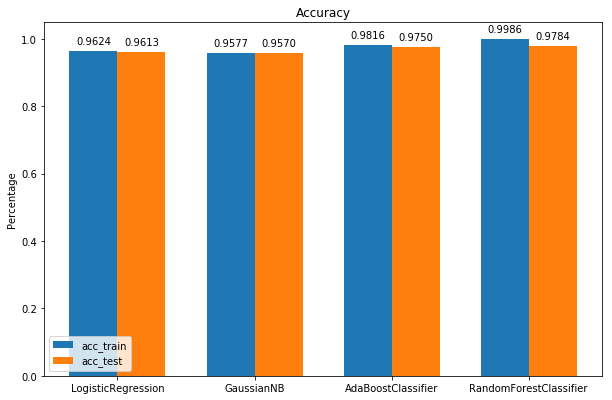

In [87]:
objects = results.keys()

xt = np.arange(len(objects))
yt = [results[i]['acc_train'] for i in results]
y1 = [results[i]['acc_test'] for i in results]

f,ax = plt.subplots(figsize=(10,6.5))

width = .35
plt.bar(xt,yt,width,label='acc_train')

plt.bar(xt+width, y1,width, label='acc_test')

plt.xticks(xt+width/2,objects)

plt.ylabel('Percentage')

plt.title('Accuracy')

plt.legend(loc='lower left')

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.4f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax)



plt.show()

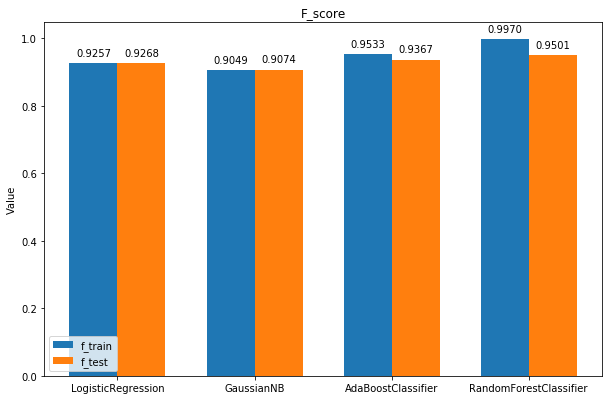

In [88]:
objects = results.keys()

xt = np.arange(len(objects))
yt = [results[i]['f_train'] for i in results]
y1 = [results[i]['f_test'] for i in results]

f,ax = plt.subplots(figsize=(10,6.5))

width = .35
plt.bar(xt,yt,width,label='f_train')

plt.bar(xt+width, y1,width, label='f_test')

plt.xticks(xt+width/2,objects)

plt.ylabel('Value')

plt.title('F_score')

plt.legend(loc='lower left')

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.show()

Confusion matrix, without normalization
[[6095   80]
 [ 210 1320]]
Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]
Confusion matrix, without normalization
[[2987   38]
 [ 109  661]]
Normalized confusion matrix
[[0.99 0.01]
 [0.14 0.86]]


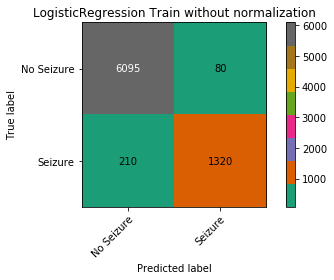

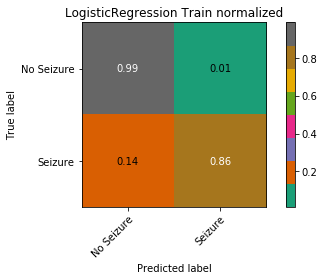

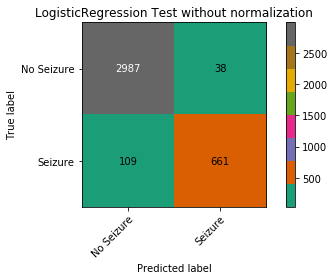

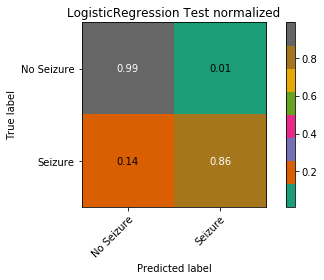

Confusion matrix, without normalization
[[6051  124]
 [ 202 1328]]
Normalized confusion matrix
[[0.98 0.02]
 [0.13 0.87]]
Confusion matrix, without normalization
[[2966   59]
 [ 104  666]]
Normalized confusion matrix
[[0.98 0.02]
 [0.14 0.86]]


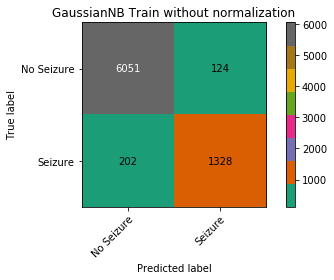

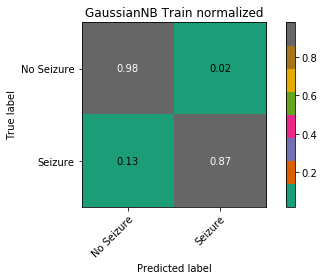

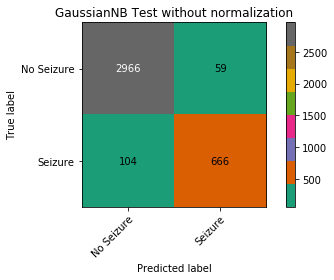

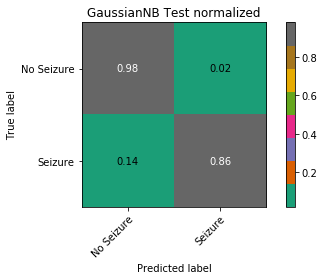

Confusion matrix, without normalization
[[6103   72]
 [  70 1460]]
Normalized confusion matrix
[[0.99 0.01]
 [0.05 0.95]]
Confusion matrix, without normalization
[[2975   50]
 [  45  725]]
Normalized confusion matrix
[[0.98 0.02]
 [0.06 0.94]]


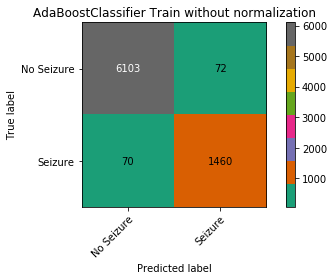

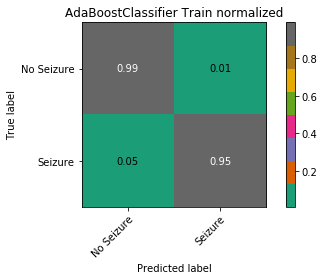

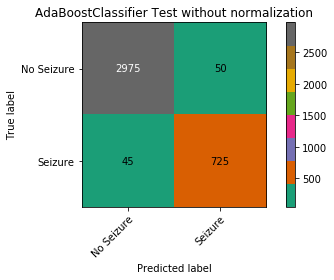

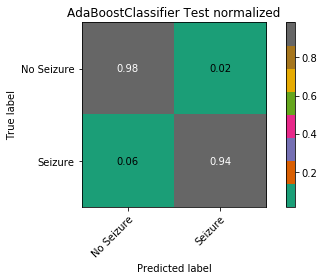

Confusion matrix, without normalization
[[6108   67]
 [  69 1461]]
Normalized confusion matrix
[[0.99 0.01]
 [0.05 0.95]]
Confusion matrix, without normalization
[[2969   56]
 [  39  731]]
Normalized confusion matrix
[[0.98 0.02]
 [0.05 0.95]]


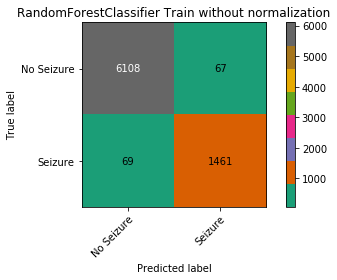

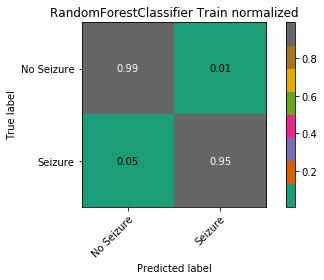

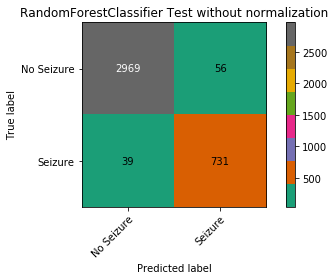

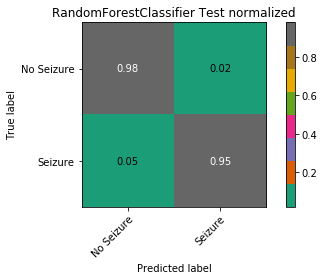

In [48]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Dark2):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

class_names = np.array(['No Seizure','Seizure'])


for i in results:
    # Plot non-normalized confusion matrix
    plot_confusion_matrix(np.array(y_train_np).flatten().astype(int), np.array(results[i]['y_train']).astype(int), classes=class_names,
                      title=i + ' Train without normalization')
    # Plot normalized confusion matrix
    plot_confusion_matrix(np.array(y_train_np).flatten().astype(int), np.array(results[i]['y_train']).astype(int), classes=class_names, normalize=True,
                      title=i + ' Train normalized')

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(np.array(y_test_np).flatten().astype(int), np.array(results[i]['y_test']).astype(int), classes=class_names,
                      title=i + ' Test without normalization')
    # Plot normalized confusion matrix
    plot_confusion_matrix(np.array(y_test_np).flatten().astype(int), np.array(results[i]['y_test']).astype(int), classes=class_names, normalize=True,
                      title=i + ' Test normalized')
    plt.show()

### Optimize Random Forest Parameters using Grid Search and Cross Validation

In [49]:
def performance_metric(y_true,y_predict):
    score = accuracy_score(y_true,y_predict)
    return score

In [50]:
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit
def fit_model(X,y):
    cv_sets = ShuffleSplit(X.shape[0],n_iter=10,test_size=.2,random_state=0)
    regressor = RandomForestClassifier()
    scoring_fnc = make_scorer(performance_metric)
    
    params = {'n_estimators':[5,10,50,100,500],'max_depth':[1,10,20,30]}
    
    grid = GridSearchCV(regressor,params,scoring_fnc,cv=cv_sets)
    
    grid = grid.fit(X,y)
    
    return grid.best_estimator_
    

/Users/jessexing/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jessexing/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [51]:
regmodel = fit_model(processed_train,y_train_np)

In [52]:
regmodel

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
results1={}

clf_name = regmodel.__class__.__name__

results1[clf_name] = train_pred(regmodel,processed_train,y_train_np,processed_test,y_test_np)

In [54]:
results1

{'RandomForestClassifier': {'acc_train': 1.0,
  'acc_test': 0.9815546772068511,
  'f_train': 1.0,
  'f_test': 0.9538621047174701,
  'confusion_train': (6175, 0, 0, 1530),
  'confusion_test': (2989, 36, 34, 736),
  'y_test': array([0, 0, 0, ..., 0, 0, 0]),
  'y_train': array([0, 0, 1, ..., 0, 1, 0])}}

Confusion matrix, without normalization
[[6175    0]
 [   0 1530]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]
Confusion matrix, without normalization
[[2989   36]
 [  34  736]]
Normalized confusion matrix
[[0.99 0.01]
 [0.04 0.96]]


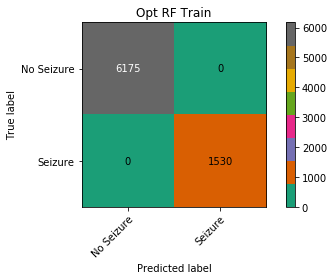

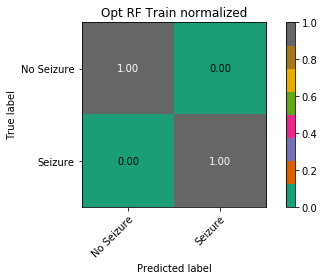

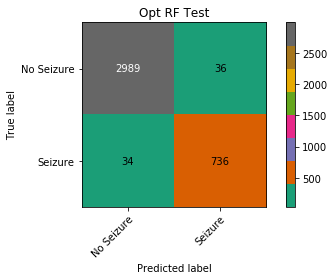

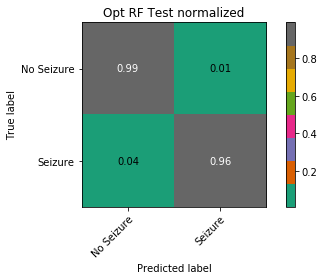

In [89]:
plot_confusion_matrix(np.array(y_train_np).flatten().astype(int), np.array(results1[i]['y_train']).astype(int), classes=class_names,
                      title= 'Opt RF Train')
plot_confusion_matrix(np.array(y_train_np).flatten().astype(int), np.array(results1[i]['y_train']).astype(int), classes=class_names, normalize=True,
                      title= 'Opt RF Train normalized')
plot_confusion_matrix(np.array(y_test_np).flatten().astype(int), np.array(results1[i]['y_test']).astype(int), classes=class_names,
                      title= 'Opt RF Test')
plot_confusion_matrix(np.array(y_test_np).flatten().astype(int), np.array(results1[i]['y_test']).astype(int), classes=class_names, normalize=True,
                      title= 'Opt RF Test normalized')
plt.show()

In [67]:
rf_probs = regmodel.predict_proba(processed_test)[:, 1]


In [74]:
from sklearn.metrics import roc_curve, auc


fpr2, tpr2, threshold=roc_curve(y_test_np.flatten(), rf_probs)

auc(fpr2,tpr2)

0.9974496082429966

W0929 14:37:31.642709 4652484032 legend.py:1384] No handles with labels found to put in legend.


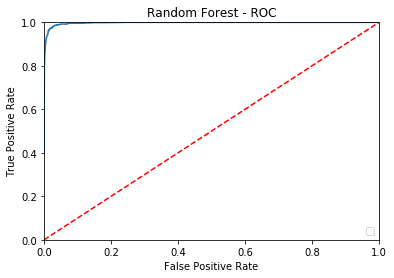

In [91]:
plt.figure()
plt.title('Random Forest - ROC')
plt.plot(fpr2, tpr2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [56]:
def fp_fn(predictions,test):
    false_positives = []
    false_negatives = []
    
    for idx in range(len(predictions)):
        if (predictions[idx] and not test[idx]):
            false_positives.append(idx)
        elif (not predictions[idx] and test[idx]):
            false_negatives.append(idx)
    return false_positives, false_negatives

In [57]:
false_positives, false_negatives = fp_fn(results1['RandomForestClassifier']['y_test'],y_test_np)

In [58]:
len(false_positives)

36

In [59]:
len(false_negatives)

34

In [60]:
processed_test.iloc[false_positives]

,max,min,median,std,percentile75,percentile25,wtavg_fourier,median_fourier,percentile75_fourier,percentile25_fourier
624,214.0,-764.0,-24.5,150.443287,60.75,-88.75,10.927116,7.827264,15.581963,4.151775
4288,242.0,-401.0,40.5,128.221052,138.75,-58.00,11.072636,7.062987,16.605242,3.380623
3991,1115.0,-328.0,-40.0,256.884062,8.75,-144.00,10.350243,7.791845,14.900692,3.646071
10183,350.0,-321.0,-144.0,117.872847,-66.75,-180.75,12.198201,8.318023,18.924544,3.662710
10606,531.0,-308.0,-122.0,151.898016,-92.50,-212.75,12.543306,9.240969,19.004092,3.882716
4262,115.0,-410.0,-20.0,93.375115,43.00,-75.25,11.131156,8.382432,15.897269,5.369434
4766,665.0,-784.0,124.0,346.423233,387.75,-237.50,10.126852,7.649657,15.209947,2.646033
1572,326.0,-377.0,-54.0,147.990804,59.00,-166.00,13.208105,11.786027,15.678176,10.033317
3895,206.0,-260.0,-3.5,118.782111,90.75,-82.00,11.713512,9.359692,16.998226,3.845148
5426,291.0,-413.0,-85.0,167.208539,98.75,-173.75,10.308500,6.983239,15.489563,3.092577


In [61]:
processed_test.iloc[false_negatives]

,max,min,median,std,percentile75,percentile25,wtavg_fourier,median_fourier,percentile75_fourier,percentile25_fourier
3016,232.0,-226.0,-86.0,118.278338,-26.00,-146.75,9.563051,6.579344,11.643839,3.921596
1408,162.0,-177.0,-51.5,77.867417,28.00,-81.00,9.727194,6.662412,13.589817,3.128805
1595,181.0,-177.0,-24.5,85.430715,70.25,-79.00,13.307763,10.840449,19.153325,6.995805
4989,93.0,-400.0,-30.0,134.506355,15.00,-93.00,11.667304,6.661536,19.871406,2.812261
9509,138.0,-285.0,-4.5,85.906652,29.00,-66.75,11.931012,9.856880,16.333892,5.707976
7386,254.0,-203.0,32.0,86.449195,91.00,-6.25,13.346154,11.571108,18.243295,5.490010
10568,165.0,-251.0,-44.0,91.314366,39.50,-113.00,13.382879,11.875834,19.838969,5.512493
5118,126.0,-401.0,27.5,152.896604,93.00,-31.00,9.705701,5.481593,12.307516,2.721142
6661,178.0,-270.0,-17.5,95.119919,40.75,-95.00,13.047161,11.895235,19.441738,4.794299
3369,171.0,-92.0,-18.5,60.305266,37.75,-56.50,12.609698,8.682172,19.935179,4.332990


In [62]:
X_test.iloc[false_positives]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
624,-97,-96,-92,-60,-42,-33,-60,-72,-80,-78,...,-217,-236,-252,-252,-258,-256,-259,-272,-297,-315
4288,-401,-380,-334,-315,-263,-234,-194,-165,-129,-92,...,-58,-65,-70,-72,-73,-74,-74,-74,-73,-74
3991,-24,-20,-15,-2,8,14,21,19,17,17,...,-232,-223,-206,-200,-190,-186,-186,-192,-193,-194
10183,350,322,299,272,253,231,209,191,176,163,...,-46,-50,-45,-40,-33,-37,-43,-47,-66,-73
10606,531,497,469,424,377,331,292,266,251,237,...,-115,-114,-112,-113,-119,-128,-139,-141,-144,-138
4262,-5,-3,-16,-23,-16,-1,10,26,38,39,...,74,80,70,51,19,-5,-16,-33,-62,-92
4766,165,248,326,387,425,440,444,437,436,437,...,-282,-253,-240,-230,-224,-218,-228,-251,-300,-334
1572,-94,-105,-95,-61,-28,7,53,85,122,135,...,-156,-120,-93,-84,-93,-97,-75,-39,-3,-23
3895,-24,-15,-3,22,40,59,73,81,92,71,...,164,163,160,155,154,153,153,163,167,169
5426,-79,-83,-104,-139,-174,-190,-200,-192,-180,-168,...,-30,-26,-45,-62,-90,-118,-146,-172,-203,-226


In [63]:
X_test.iloc[false_negatives]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
3016,-52,-47,-44,-39,-30,-19,-26,-43,-67,-49,...,-89,-89,-85,-84,-88,-86,-86,-86,-94,-94
1408,-31,-38,-52,-64,-69,-76,-77,-79,-80,-85,...,-78,-76,-75,-78,-81,-81,-76,-72,-63,-55
1595,60,64,79,106,133,145,129,95,42,-7,...,-99,-93,-79,-61,-49,-50,-72,-97,-113,-104
4989,12,15,14,14,9,8,3,7,5,4,...,67,72,70,71,72,73,79,85,91,90
9509,69,39,3,-45,-88,-122,-146,-175,-220,-259,...,-118,-155,-174,-162,-136,-111,-91,-74,-57,-37
7386,202,193,167,140,111,88,67,56,58,69,...,-52,-3,13,-69,-141,-182,-158,-124,-93,-74
10568,45,46,47,45,46,48,51,51,50,49,...,-40,-73,-106,-137,-147,-145,-132,-119,-104,-90
5118,94,92,94,96,101,102,105,107,110,112,...,-219,-195,-152,-112,-74,-47,-22,-11,-10,0
6661,-73,-64,-47,-30,-16,-10,-20,-64,-126,-175,...,-153,-148,-147,-187,-232,-270,-264,-222,-168,-134
3369,100,82,56,45,41,41,45,54,67,81,...,-16,5,35,65,71,36,-10,-44,-53,-36


In [64]:
def plotsub(data,label):
    x = range(len(data))
    plt.figure()
    plt.plot(x,data)
    plt.title(label)
    plt.xlabel('Sample #')
    plt.ylabel('EEG Reading')

/Users/jessexing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


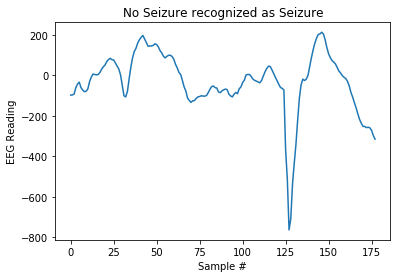

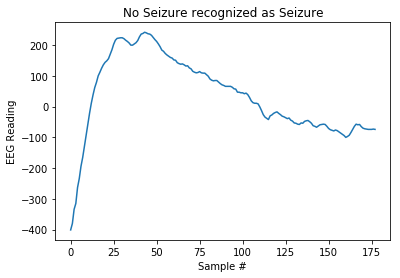

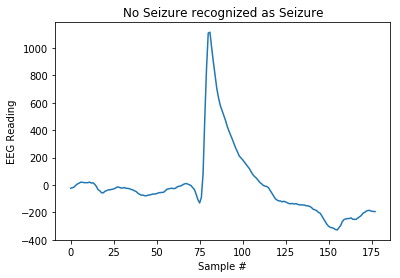

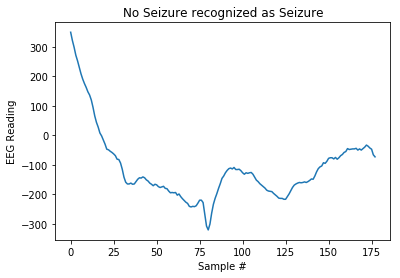

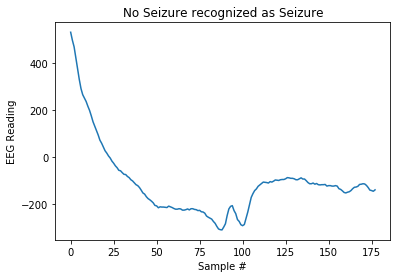

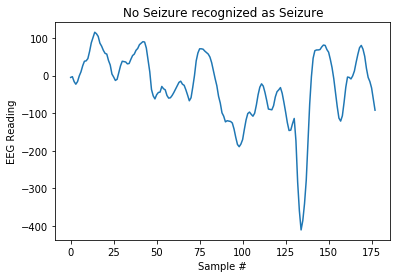

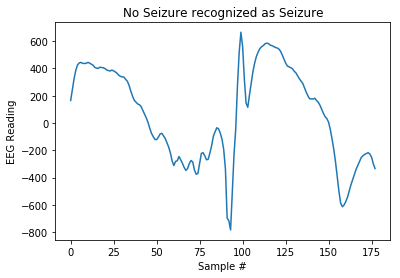

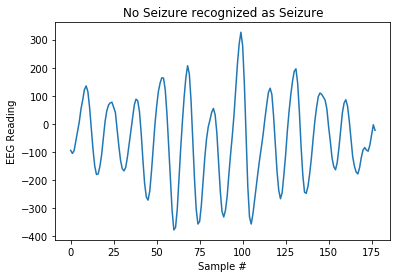

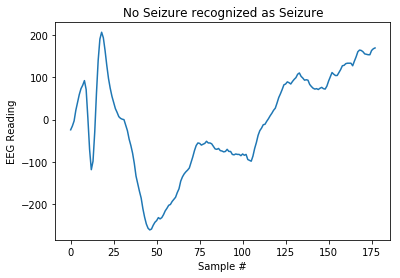

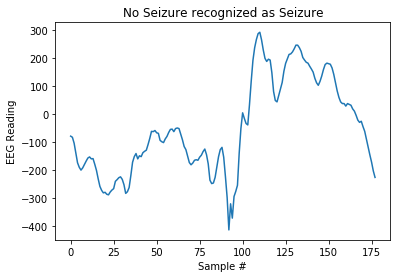

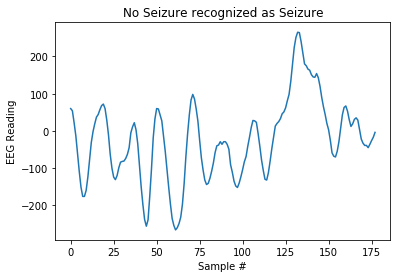

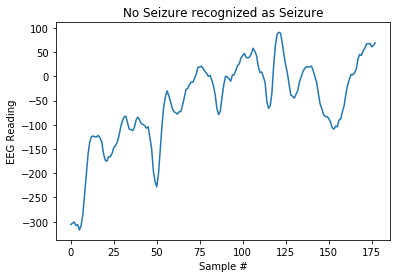

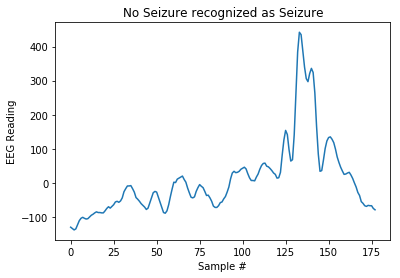

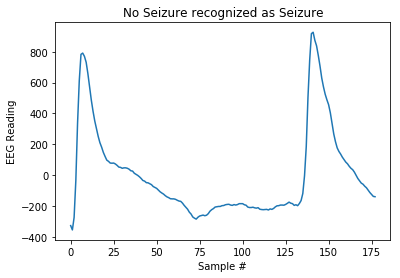

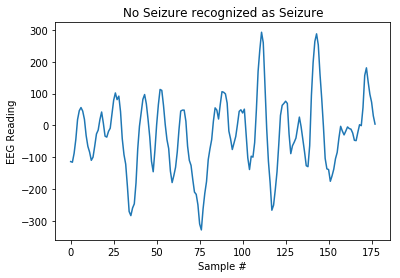

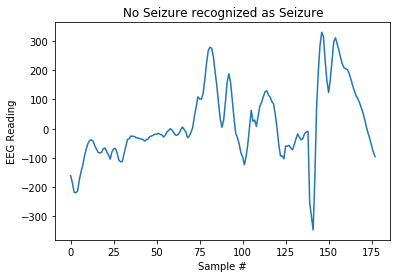

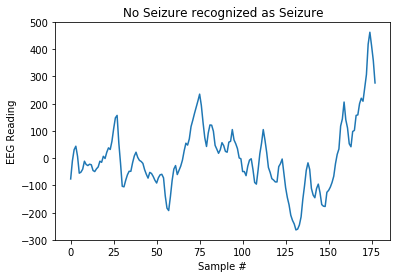

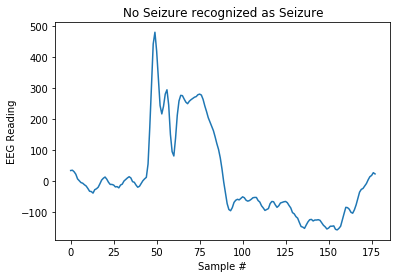

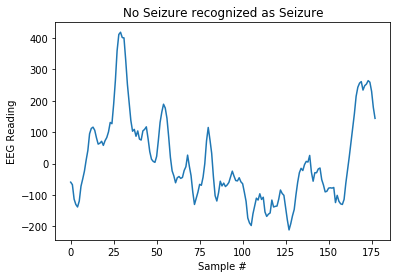

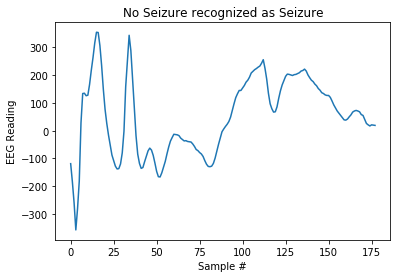

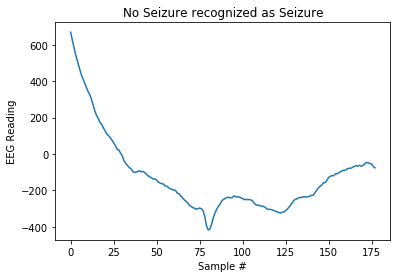

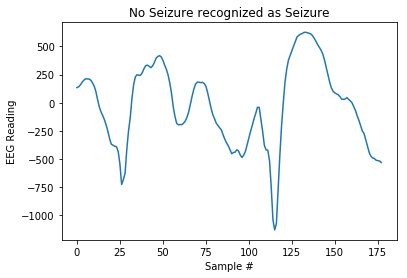

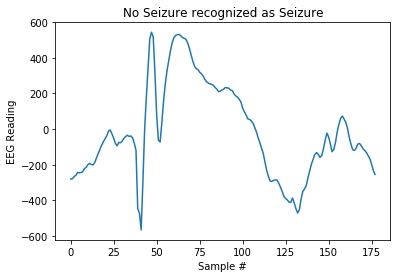

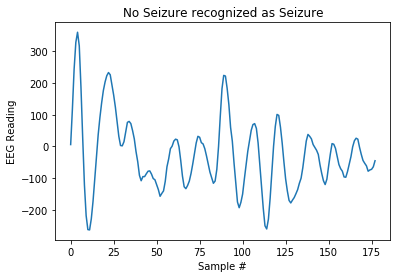

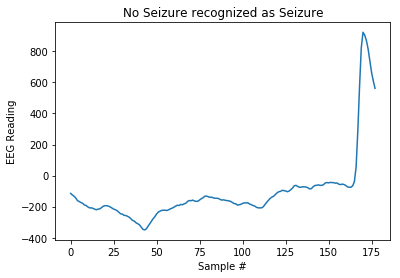

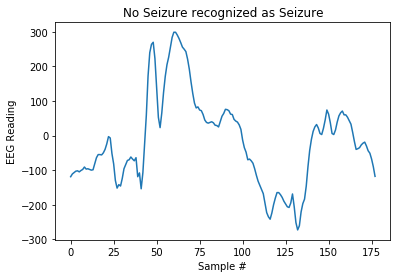

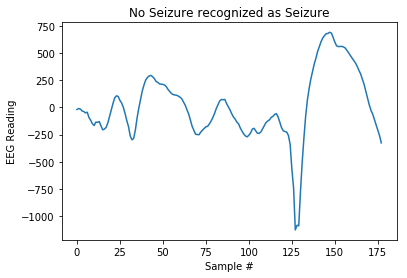

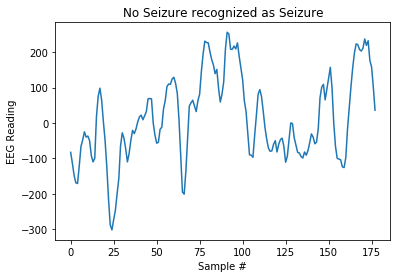

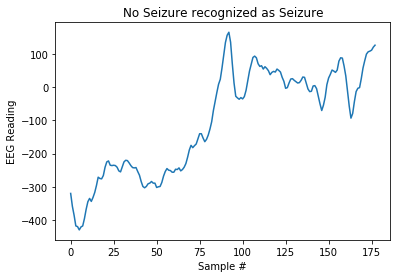

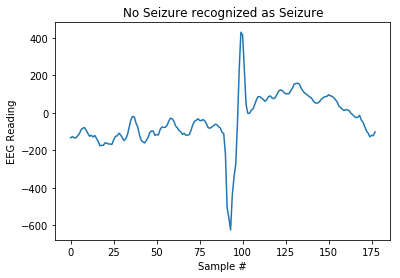

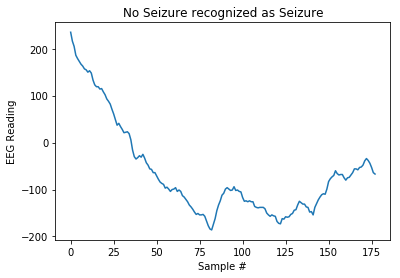

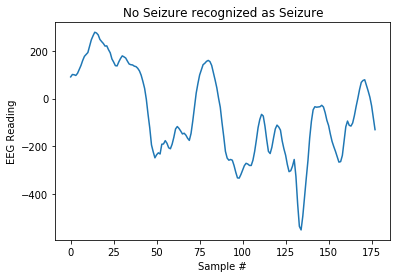

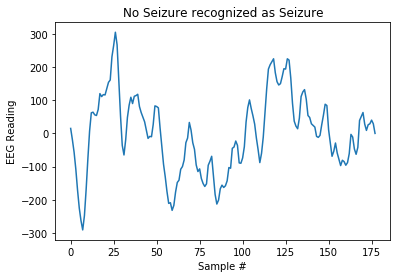

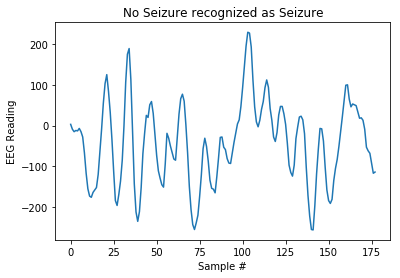

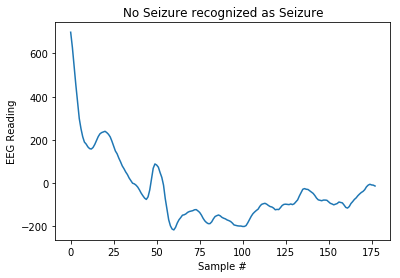

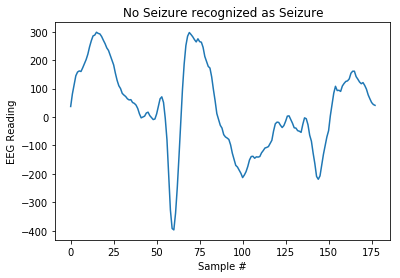

In [65]:
fp_test = X_test.iloc[false_positives]
for row in fp_test.iterrows():
    #print(row)  
    #print(row[1])
    plotsub(row[1],'No Seizure recognized as Seizure')

/Users/jessexing/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


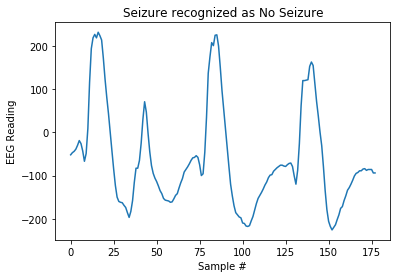

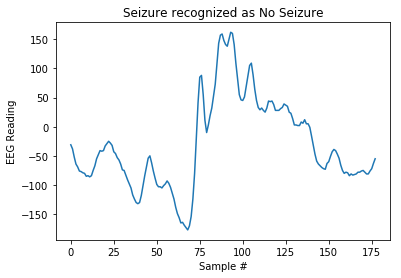

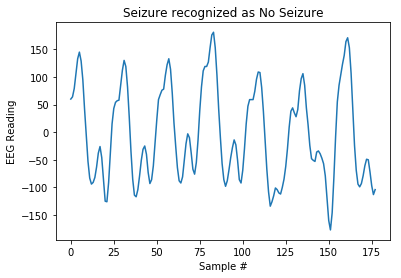

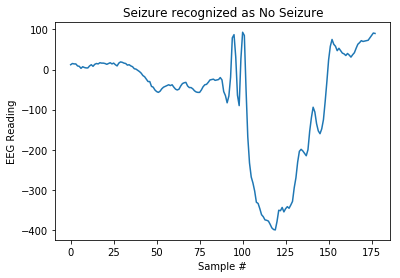

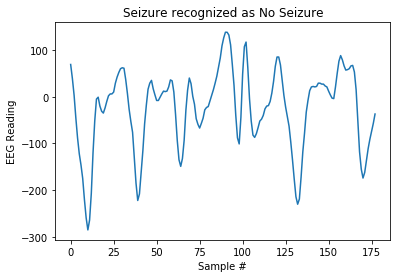

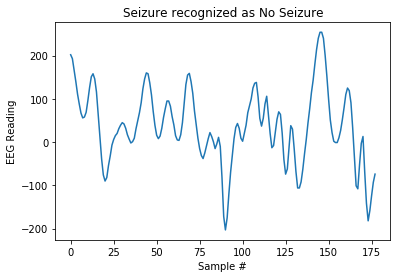

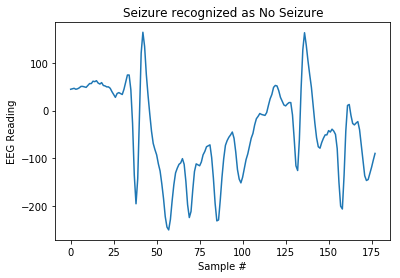

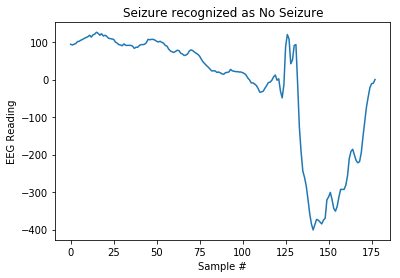

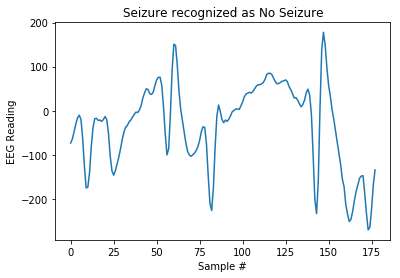

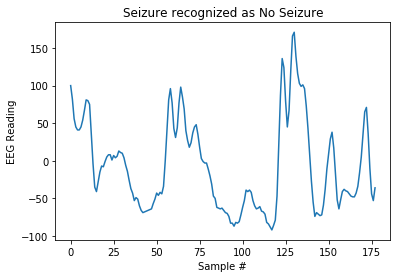

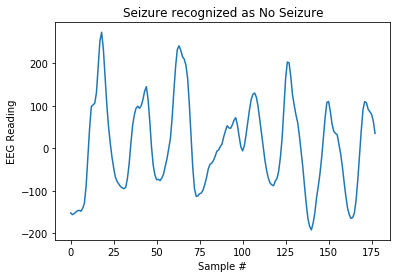

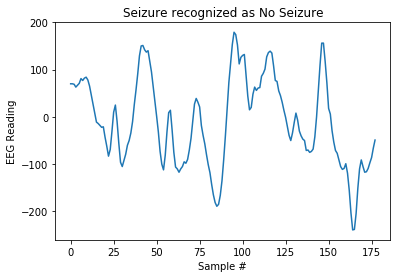

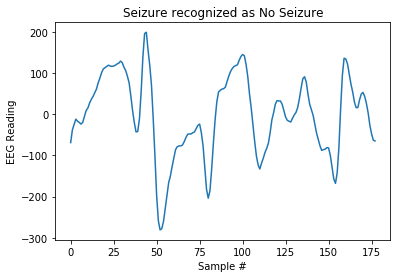

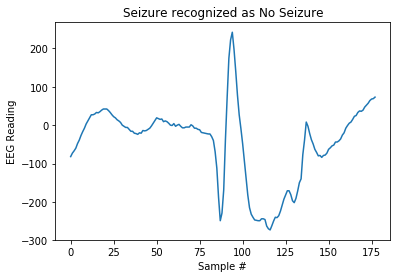

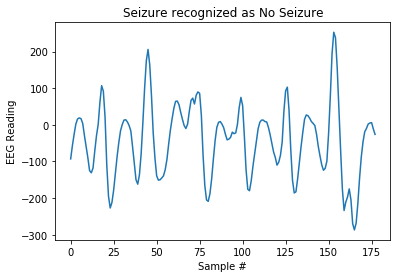

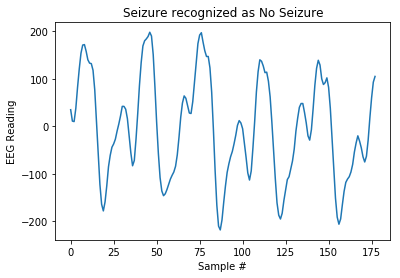

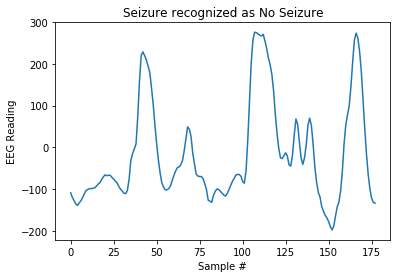

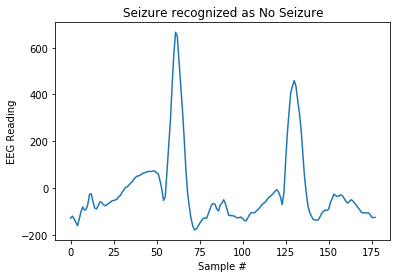

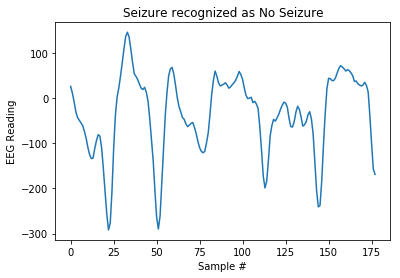

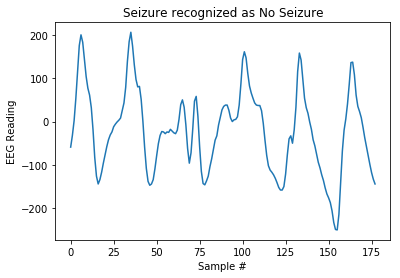

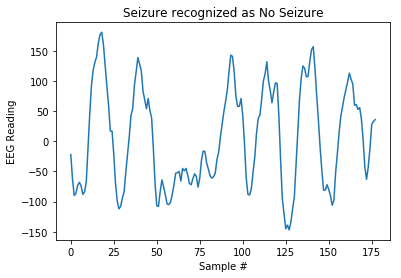

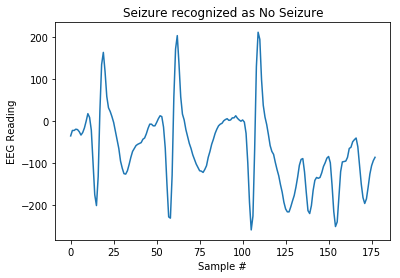

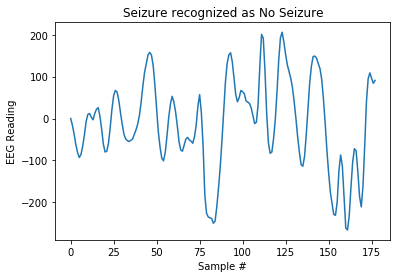

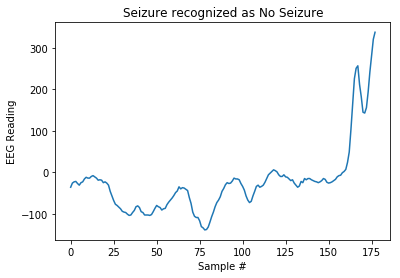

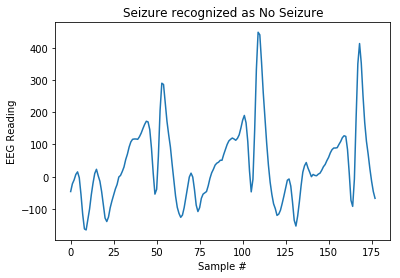

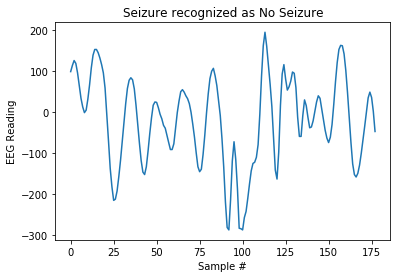

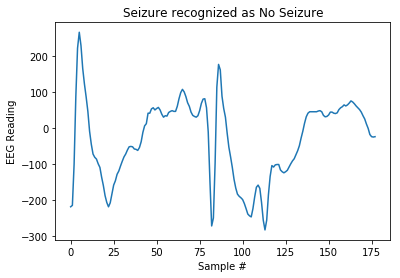

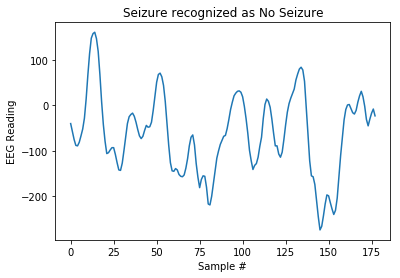

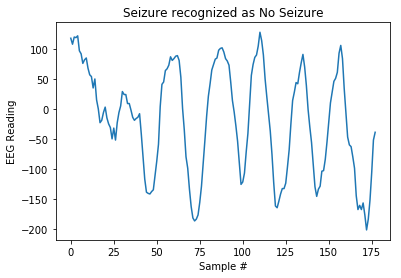

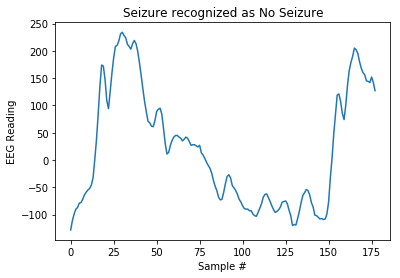

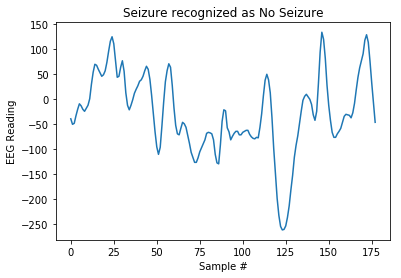

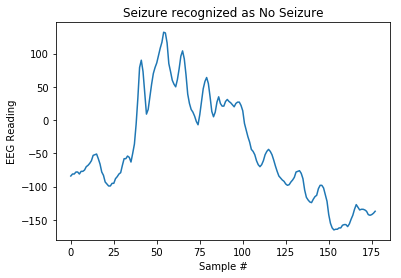

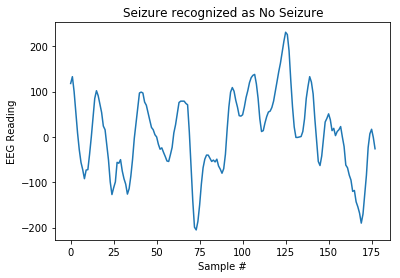

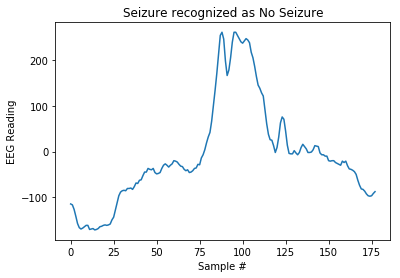

In [66]:
fn_test = X_test.iloc[false_negatives]
for row in fn_test.iterrows():
    #print(row)  
    #print(row[1])
    plotsub(row[1],'Seizure recognized as No Seizure')